In [ ]:
"""
Purpose: To check the errors on the validation test set
to get ideas on how to make validation score go up

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty/")

In [3]:
from pathlib import Path
import numpy as np
import neuron_visualizations as nviz
import datajoint as dj

import proofreading_utils as pru
import classification_utils as clu

import neuron_utils as nru
import validation_utils as vu
import pandas as pd
import datajoint_utils as du

INFO - 2021-03-31 18:07:32,744 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-31 18:07:32,745 - settings - Setting database.user to celiib
INFO - 2021-03-31 18:07:32,746 - settings - Setting database.password to newceliipass
INFO - 2021-03-31 18:07:32,750 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-03-31 18:07:32,751 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-31 18:07:32,760 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-03-31 18:07:33,106 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-31 18:07:33,110 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-31 18:07:33,112 - settings - Setting database.user to celiib
INFO - 2021-03-31 18:07:33,112 - settings - Setting database.password to newceliipass
INFO - 2021-03-31 18:07:33,113 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-31 18:07:33,114 - settings - Setting database.user to celiib
INFO - 2021-03-31 18:07:33,115 - settings - Setting database.password to newceliipass
INFO - 2021-03-31 18:07:33,117 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-31 18:07:33,538 - settings - Setting enable_python_native_blobs to True


# Computing the validation statistics (to pick the ones to look at)

In [5]:
segment_ids = du.proofreading_stats_table(validation=True).fetch("segment_id")

validation_dfs = [vu.synapse_validation_df_single_neuron(k,
                                        remove_presyn_on_dendrite = False,
                        count_presyn_on_dendrite_as_correct = True,
                                                        include_extension_synapse=False) for k in segment_ids]

Synapsse Results:
Total Number of Synapses = 3990
n_valid_syn_ids_presyn = 5
n_errored_syn_ids_presyn = 29
n_valid_syn_ids_postsyn = 3891
n_errored_syn_ids_postsyn = 65
Synapsse Results:
Total Number of Synapses = 4434
n_valid_syn_ids_presyn = 39
n_errored_syn_ids_presyn = 482
n_valid_syn_ids_postsyn = 3898
n_errored_syn_ids_postsyn = 15
Synapsse Results:
Total Number of Synapses = 923
n_valid_syn_ids_presyn = 13
n_errored_syn_ids_presyn = 153
n_valid_syn_ids_postsyn = 753
n_errored_syn_ids_postsyn = 4
Synapsse Results:
Total Number of Synapses = 4361
n_valid_syn_ids_presyn = 86
n_errored_syn_ids_presyn = 621
n_valid_syn_ids_postsyn = 3649
n_errored_syn_ids_postsyn = 5
Synapsse Results:
Total Number of Synapses = 3452
n_valid_syn_ids_presyn = 76
n_errored_syn_ids_presyn = 345
n_valid_syn_ids_postsyn = 3007
n_errored_syn_ids_postsyn = 24
Synapsse Results:
Total Number of Synapses = 3190
n_valid_syn_ids_presyn = 18
n_errored_syn_ids_presyn = 89
n_valid_syn_ids_postsyn = 3081
n_errored_sy

Synapsse Results:
Total Number of Synapses = 1645
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 108
n_valid_syn_ids_postsyn = 1536
n_errored_syn_ids_postsyn = 1
Synapsse Results:
Total Number of Synapses = 4633
n_valid_syn_ids_presyn = 72
n_errored_syn_ids_presyn = 219
n_valid_syn_ids_postsyn = 4328
n_errored_syn_ids_postsyn = 14
Synapsse Results:
Total Number of Synapses = 2383
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 47
n_valid_syn_ids_postsyn = 2334
n_errored_syn_ids_postsyn = 2
Synapsse Results:
Total Number of Synapses = 4015
n_valid_syn_ids_presyn = 12
n_errored_syn_ids_presyn = 109
n_valid_syn_ids_postsyn = 3879
n_errored_syn_ids_postsyn = 15
Synapsse Results:
Total Number of Synapses = 1914
n_valid_syn_ids_presyn = 3
n_errored_syn_ids_presyn = 212
n_valid_syn_ids_postsyn = 1528
n_errored_syn_ids_postsyn = 171
Synapsse Results:
Total Number of Synapses = 10012
n_valid_syn_ids_presyn = 8
n_errored_syn_ids_presyn = 164
n_valid_syn_ids_postsyn = 9825
n_errored_

In [15]:
curr_validation_df

,synapse_id,synapse_type,auto_valid,synapse_x,synapse_y,synapse_z,manual_valid,category,old_segment_id,new_segment_id,euclidean_distance_to_nuclei
0,343254413,presyn,True,1155616,623184,1106200,True,TP,864691136545546146,864691135700409211,167185.430944
1,343254632,presyn,True,1156584,624656,1105600,True,TP,864691136545546146,864691135700409211,166078.490552
2,350190489,presyn,True,1174432,645680,1082000,True,TP,864691136545546146,864691135700409211,138160.483844
3,352680416,presyn,True,1172128,640256,1088400,True,TP,864691136545546146,864691135700409211,143683.921773
4,354877614,presyn,True,1166408,631904,1097840,True,TP,864691136545546146,864691135700409211,153885.395278
...,...,...,...,...,...,...,...,...,...,...,...
2870,385162788,postsyn,False,1244792,377360,953840,True,FN,864691136545546146,864691135700409211,250647.235644
2871,385162943,postsyn,False,1245528,379944,952240,True,FN,864691136545546146,864691135700409211,248215.147322
2872,385163214,postsyn,False,1246568,380248,953720,True,FN,864691136545546146,864691135700409211,247643.262133
2873,385163449,postsyn,False,1247560,382000,954680,True,FN,864691136545546146,864691135700409211,245712.873737


Segment_id = 864691136545546146


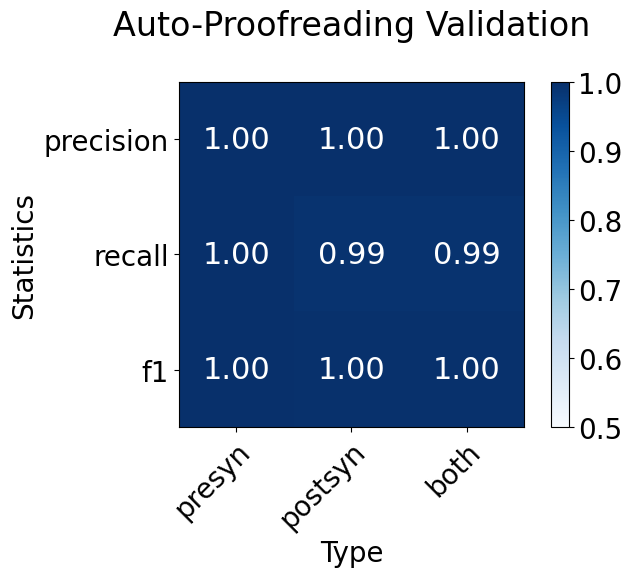

In [14]:
curr_idx = 23
segment_id = segment_ids[curr_idx]
print(f"Segment_id = {segment_id}")
curr_validation_df = validation_dfs[curr_idx]
vu.synapse_validation_df_to_score_plot(curr_validation_df)

# Picking the neuron to visualize

In [17]:
du.plot_proofread_validation_neuron(
    segment_id = segment_id,
    validation_df=curr_validation_df,
    verbose = True,
    synapse_type = "presyn",
)

Working on Neuron: 864691136545546146


Synapse Category Results, synapse_type = presyn
# of TP = 19
# of TN = 1
# of FP = 0
# of FN = 0
No axon skeleton attribute stored in database table


TP:yellow
TN:aqua
FP:black
FN:orange


# Checking the neuron proofreading

In [18]:
segment_id = vu.validation_df_to_old_segment_id(curr_validation_df)
segment_id

864691136545546146

In [19]:
neuron_objs,neuron_split_idxs = du.decomposition_with_spine_recalculation(segment_id)

Decompressing Neuron in minimal output mode...please wait
Pulled from Table Decomposition so setting split_index = 0
Dont need spine recalculation
Number of Neurons found = 1


In [20]:
neuron_obj = neuron_objs[0]
neuron_obj.segment_id

864691136545546146

In [21]:
clu.axon_classification(neuron_obj,
                       plot_axons=True)


Part 1: Axon like branchese 
{'L0': array([5]), 'L4': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])}
Limb L0 soma angle: 11.3 
Limb L1 soma angle: 98.86 
Limb L2 soma angle: 88.93 
Limb L3 soma angle: 140.78 
Limb L4 soma angle: 145.22 
Limb L5 soma angle: 106.24 

Part 2: possible_axon_limbs = [1, 2, 3, 4, 5]

Phase 2: Working on Limb L1
nodes_to_eliminate = []

Phase 2: Working on Limb L2
nodes_to_eliminate = [8]

Phase 2: Working on Limb L3
nodes_to_eliminate = [5 9]

Phase 2: Working on Limb L4
nodes_to_eliminate = []

Phase 2: Working on Limb L5
nodes_to_eliminate = []

----Working on Limb L1-----
No nodes were eliminated so don't need to add back any candidates

----Working on Limb L2-----
No endpoints were eliminated so don't need to add back any candidates

----Working on Limb L3-----
No endpoints were eliminated so don't need to add back any candidates

----Working on Limb L4-----
No nodes were eliminated so don't need to add back any candidates


base_final_widths = [ 71.2684394  176.65866322 201.47105814]
overall_ais_width = 163.96293997712442
ais_width = 149.79938691820925
Adding the following branches as true axons: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
curr_soma_angle = 145.22
max_axon_angle = 163.4172722030586
Changing to a better axon candidate


 --- Working on limb 5, candidate # 0
0 out of 1 branches are axons
Axon percentage = 0.0
Not adding candidate no axon branches detected 
Using the best axon approach
Using True
Limb L4: Axon branches before dendritic path filter = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
Limb L4: Axon branches AFTER dendritic path filter = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]


Part 4: final_true_axons = {'L4': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16.])}

 Working on visualization type: mesh


({'L4': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
         13., 14., 15., 16.])},
 {'L0': array([5])})

In [23]:
nviz.plot_axon(neuron_obj,skeleton = True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Filtering Dendrite on Axon then recomputing High Fidelity Axon

In [373]:
plot_limb_branch_filter_with_disconnect_effect = False
verbose = False
verbose_outline = True

pre_filters = pru.get_exc_filters_high_fidelity_axon_preprocessing()
o_neuron_pre, filtering_info_pre = pru.apply_proofreading_filters_to_neuron(input_neuron = neuron_obj,
                                        filter_list = pre_filters,
                    plot_limb_branch_filter_with_disconnect_effect=plot_limb_branch_filter_with_disconnect_effect,
                                        plot_limb_branch_filter_away=False,
                                        plot_final_neuron=False,

                                        return_error_info=True,
                                         verbose=verbose,
                                        verbose_outline=verbose_outline)


--- Working on filter 0:
function = dendrite_on_axon_merges
function __name__ = filter_away_dendrite_on_axon_merges
function arguments = {'use_pre_existing_axon_labels': True}





 ---- Total time for applying filter: 1.5394892692565918 -----


In [374]:
# Getting the high fidelity axon
neuron_obj_high_fid_axon = pru.refine_axon_for_high_fidelity_skeleton(o_neuron_pre)

Starting axon branch was the starting node so using border vertices and NOT computing upstream branch
upstream_node_to_axon_starting_branch = None


  0%|          | 0/1 [00:00<?, ?it/s]

root_curr = [1272394.   632033.6  980102.4]
Time for preparing soma vertices and root: 0.0004725456237792969
invalidation_d = 2000
cc_vertex_thresh = 10


  0%|          | 0/40101 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  2.12it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.9762043952941895
branches_touching_root = [5]
combining close nodes
combine_threshold = 1300
length of Graph = 8917
After combining close endpoints max(kept_branches_idx) = 30, len(kept_branches_idx) = 31
empty_indices % = 0.0
 conflict_indices % = 0.009127674759287316


  0%|          | 0/15 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/31 [00:00<?, ?it/s]

Decomposing first pass: 5.926814556121826
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.910064697265625e-05
Total time for MAP sublimb processing 4.0531158447265625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 0.0010612010955810547
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.050627946853637695
sbv[0].reshape(-1,3) = [[1272394.   632033.6  980102.4]]
closest_sk_pt_coord BEFORE = [1272753.70534828  632356.19846315  980489.44992463]
current_skeleton.shape = (452, 2, 3)
node_for_stitch = 452: [1272753.70534828  632356.19846315  980489.44992463]
node_for_stitch AFTER = 452: [1272753.70534828  632356.19846315  980489.44992463]
possible_node_loc = [450 452]
possible_node_loc AFTER = [450 452]
curr_shortest_path = [452]
Current stitch point was a branch or endpoint
change_st

  0%|          | 0/1 [00:00<?, ?it/s]

Removed 1 skeletal branches


  0%|          | 0/31 [00:00<?, ?it/s]

79866 79867
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/29 [00:00<?, ?it/s]

Limb Correspondence before stitching = 29
Limb Correspondence AFTER stitching = 29
Upstream node was None so don't have to adjust
concept_network_dict = {0: [<networkx_utils.GraphOrderedEdges object at 0x7fe8970d9550>]}


----Working on seperate_graph 0----


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [1272753.70534828  632356.19846315  980489.44992463]---------
Starting_edge inside branches_to_conept = [[1272741.7341808   674594.74403301  982583.25549652]
 [1272753.70534828  632356.19846315  980489.44992463]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [20]
printing out current edge:
[[1272753.70534828  632356.19846315  980489.44992463]
 [1272741.7341808   674594.74403301  982583.25549652]]
edge_endpoints_to_process was empty so exiting loop after 29 iterations
starting_node in concept map (that should match the starting edge) = 18
Total time for branches to concept conversion = 0.6349184513092041

Done generating c

In [375]:
nviz.plot_axon(neuron_obj_high_fid_axon)


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Computing the Boutons of the Axon

In [440]:
import axon_utils as au
neuron_obj_with_boutons = au.calculate_boutons(#parameters for run
neuron_obj = neuron_obj_high_fid_axon,
plot_axon_branches_to_check = False,
plot_boutons = True,
verbose = False,
)


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Computing the Webbing

In [444]:
neuron_obj_with_web = au.calculate_axon_webbing(neuron_obj_with_boutons,
                      idx_to_plot = [0],
                plot_intersection_mesh = True,
                plot_intersection_mesh_without_boutons = True,
                plot_split = True,
                plot_split_closest_mesh = True,
                plot_segmentation_before_web = True,
                plot_web = True,
                        plot_webbing_on_neuron = True,
                    verbose = True,
                        )

branches_to_check_for_webbing = [ 3  5  6  8 11 12 13 18 19 20 21 22 25 27]

 -- Working on Node 0: Branch 3
Upstream Node (red), Downstream Nodes (aqua)


Upstream Node (red), Downstream Nodes (aqua)


joining_endpoint_1 = [1216461.20063894  683082.30315186 1029657.5916486 ]
coordinates_of_intersection = [array([1216382.96411963,  683510.26719732, 1029903.90002271]), array([1216563.00600507,  682804.31262984, 1030059.52295796]), array([1216486.16871561,  682848.22785324, 1029216.50932277])]
Mesh Split with significance_threshold = 20


  0%|          | 0/9 [00:00<?, ?it/s]

Segmentation Info:
Mesh 0: <trimesh.Trimesh(vertices.shape=(104, 3), faces.shape=(201, 3))> (0.0936978)
Mesh 1: <trimesh.Trimesh(vertices.shape=(71, 3), faces.shape=(136, 3))> (0.09351514999999999)
Mesh 2: <trimesh.Trimesh(vertices.shape=(64, 3), faces.shape=(119, 3))> (0.707347)
Mesh 3: <trimesh.Trimesh(vertices.shape=(62, 3), faces.shape=(118, 3))> (0.131666)
Mesh 4: <trimesh.Trimesh(vertices.shape=(61, 3), faces.shape=(113, 3))> (0.192354)
Mesh 5: <trimesh.Trimesh(vertices.shape=(60, 3), faces.shape=(111, 3))> (0.123656)
Mesh 6: <trimesh.Trimesh(vertices.shape=(44, 3), faces.shape=(82, 3))> (0.1276145)
Mesh 7: <trimesh.Trimesh(vertices.shape=(25, 3), faces.shape=(44, 3))> (0.164754)
Mesh 8: <trimesh.Trimesh(vertices.shape=(24, 3), faces.shape=(42, 3))> (0.6368745)


web_mesh = <trimesh.Trimesh(vertices.shape=(64, 3), faces.shape=(119, 3))>, web_cdf = 0.707347

 -- Working on Node 1: Branch 5
joining_endpoint_1 = [1219453.78905928  678747.84504584 1023104.35637144]
coordinates_of_intersection = [array([1219344.27094817,  678237.86392844, 1023310.99723309]), array([1219267.57086685,  679187.67715832, 1023239.61998518]), array([1219755.37929311,  678887.08264316, 1022730.79070321])]


  0%|          | 0/11 [00:00<?, ?it/s]

web_mesh = <trimesh.Trimesh(vertices.shape=(98, 3), faces.shape=(189, 3))>, web_cdf = 0.460643

 -- Working on Node 2: Branch 6
joining_endpoint_1 = [1242184.92874804  927286.71609319 1041277.25728136]
coordinates_of_intersection = [array([1242269.63029859,  927866.33159246, 1041232.90568624]), array([1242277.14367004,  927187.00055099, 1041809.26822473]), array([1242083.54513478,  926893.7616837 , 1040985.40699234])]


  0%|          | 0/91 [00:00<?, ?it/s]

web_mesh = <trimesh.Trimesh(vertices.shape=(155, 3), faces.shape=(293, 3))>, web_cdf = 0.433575

 -- Working on Node 3: Branch 8
joining_endpoint_1 = [1242399.7154334   880011.91429822 1024859.80299775]
coordinates_of_intersection = [array([1242000.40328848,  880429.194808  , 1024976.7256141 ]), array([1242740.2491812 ,  880246.26913428, 1024578.94889461]), array([1242573.26257033,  879546.35339865, 1024915.67350549])]


  0%|          | 0/106 [00:00<?, ?it/s]

web_mesh = <trimesh.Trimesh(vertices.shape=(360, 3), faces.shape=(703, 3))>, web_cdf = 0.328745

 -- Working on Node 4: Branch 11
joining_endpoint_1 = [1269169.99265729  769469.47988036  990631.82532513]
coordinates_of_intersection = [array([1269358.8743146 ,  769787.1383213 ,  990992.51902671]), array([1268635.50285199,  769537.15046162,  990440.45792025]), array([1269343.05225762,  769035.10022119,  990456.18057911])]


  0%|          | 0/138 [00:00<?, ?it/s]

web_mesh = <trimesh.Trimesh(vertices.shape=(164, 3), faces.shape=(313, 3))>, web_cdf = 0.470639

 -- Working on Node 5: Branch 12
joining_endpoint_1 = [1266091.19883481  696616.08107994  972729.57887759]
coordinates_of_intersection = [array([1265961.51755302,  696727.71017449,  972265.58672502]), array([1266535.57104227,  696750.24030406,  972544.16812887]), array([1265849.08826225,  696364.62809322,  973180.03861682])]


  0%|          | 0/24 [00:00<?, ?it/s]

web_mesh = <trimesh.Trimesh(vertices.shape=(69, 3), faces.shape=(128, 3))>, web_cdf = 0.3786395

 -- Working on Node 6: Branch 13
joining_endpoint_1 = [1263675.8560901   693277.56771598  979951.12530957]
coordinates_of_intersection = [array([1263137.13698996,  693244.41344368,  980036.6365113 ]), array([1263771.56954777,  693383.19151226,  979472.03972553]), array([1264061.80699069,  693166.80103955,  980248.25210276])]


  0%|          | 0/16 [00:00<?, ?it/s]

web_mesh = <trimesh.Trimesh(vertices.shape=(162, 3), faces.shape=(289, 3))>, web_cdf = 0.244424

 -- Working on Node 7: Branch 18
joining_endpoint_1 = [1272741.7341808   674594.74403301  982583.25549652]
coordinates_of_intersection = [array([1272749.70321024,  675089.84399044,  982515.34446842]), array([1273165.0342592 ,  674462.42263264,  982812.02967485]), array([1272474.10351592,  674174.43038996,  982542.31347004])]


  0%|          | 0/39 [00:00<?, ?it/s]

web_mesh = <trimesh.Trimesh(vertices.shape=(233, 3), faces.shape=(451, 3))>, web_cdf = 0.546813

 -- Working on Node 8: Branch 19
joining_endpoint_1 = [1267776.69414603  692701.05687253  983254.48376296]
coordinates_of_intersection = [array([1267306.52858094,  692530.2437082 ,  983120.1564357 ]), array([1267977.86500652,  693145.05798804,  983365.7185445 ]), array([1267892.92386417,  692220.13107885,  983185.12642224])]


  0%|          | 0/22 [00:00<?, ?it/s]

web_mesh = <trimesh.Trimesh(vertices.shape=(117, 3), faces.shape=(200, 3))>, web_cdf = 0.596239

 -- Working on Node 9: Branch 20
joining_endpoint_1 = [1271346.91378915  702772.26308223  984182.10009978]
coordinates_of_intersection = [array([1271483.54057149,  703206.79216427,  984379.85713677]), array([1271405.69337462,  702889.58915943,  983679.79970534]), array([1271180.10416086,  702308.32425419,  984359.62676284])]


  0%|          | 0/54 [00:00<?, ?it/s]

web_mesh = <trimesh.Trimesh(vertices.shape=(94, 3), faces.shape=(169, 3))>, web_cdf = 0.555934

 -- Working on Node 10: Branch 21
joining_endpoint_1 = [1273672.26317785  683171.77245944  981705.70354634]
coordinates_of_intersection = [array([1273483.20305439,  683672.22294864,  981591.48434922]), array([1274124.47046761,  683292.19838967,  981878.42980398]), array([1273619.04232318,  682666.35805656,  981801.466735  ])]


  0%|          | 0/15 [00:00<?, ?it/s]

web_mesh = <trimesh.Trimesh(vertices.shape=(158, 3), faces.shape=(305, 3))>, web_cdf = 0.660049

 -- Working on Node 11: Branch 22
joining_endpoint_1 = [1279772.83312792  674283.56061183  986140.75473685]
coordinates_of_intersection = [array([1279849.947671  ,  674119.16498135,  986650.88304282]), array([1280153.45249342,  674594.79229829,  986052.34548198]), array([1279400.10929646,  674194.63310389,  985722.25078767])]


  0%|          | 0/17 [00:00<?, ?it/s]

web_mesh = <trimesh.Trimesh(vertices.shape=(110, 3), faces.shape=(202, 3))>, web_cdf = 0.4588775

 -- Working on Node 12: Branch 25
joining_endpoint_1 = [1277693.91721463  666480.33010946  998693.85298009]
coordinates_of_intersection = [array([1277384.02556308,  666384.76132847,  999138.72863577]), array([1277838.24759297,  666022.09258261,  998563.58453033]), array([1277896.61089944,  666779.69854032,  998348.53076733])]


  0%|          | 0/13 [00:00<?, ?it/s]

web_mesh = <trimesh.Trimesh(vertices.shape=(133, 3), faces.shape=(254, 3))>, web_cdf = 0.6621585

 -- Working on Node 13: Branch 27
joining_endpoint_1 = [1279712.35354271  669030.25418228  993566.51159415]
coordinates_of_intersection = [array([1279675.64442825,  668989.13411599,  994122.86849841]), array([1279692.08025977,  668587.40144323,  993337.20194052]), array([1279722.05857917,  669329.04164685,  993165.99352115])]


  0%|          | 0/12 [00:00<?, ?it/s]

web_mesh = <trimesh.Trimesh(vertices.shape=(34, 3), faces.shape=(60, 3))>, web_cdf = 0.60563

 Working on visualization type: mesh

 Working on visualization type: skeleton


In [445]:
nviz.plot_boutons(neuron_obj,
                  mesh_whole_neuron_alpha = 0.2,
                 plot_web=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton
